# Appendix 6-Corrolation Heat Map

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data_final.csv')
df.head()

,Unnamed: 0,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,...,genres_1,genres_2,genres_3,genres_4,genres,Decade,key_name,mode_name,key_full,hit_flop
0,0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,...,canadian contemporary r&b,canadian pop,dance pop,electropop,Pop,10s,C#,Minor,C# Minor,Hit
1,1,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,...,danish pop,pop,scandipop,0,Pop,10s,A,Minor,A Minor,Hit
2,2,Here's To Never Growing Up,Avril Lavigne,spotify:track:0qwcGscxUHGZTgq0zcaqk1,0.482,0.873,0,-3.145,1,0.0853,...,canadian pop,candy pop,dance pop,pop,Pop,10s,C,Major,C Major,Hit
3,3,Crawling Back To You,Daughtry,spotify:track:6BDtTzjbJ5kKKSWcJT8MlX,0.438,0.919,0,-2.910,0,0.0495,...,alternative metal,neo mellow,pop rock,post-grunge,Pop,10s,C,Minor,C Minor,Hit
4,4,Faster,Matt Nathanson,spotify:track:6plKFdrBnKF0y3CRuceTDh,0.742,0.853,9,-4.147,1,0.0393,...,acoustic pop,indiecoustica,neo mellow,pop rock,Pop,10s,A,Major,A Major,Hit


In [3]:
df=df.iloc[:,1:]
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,genres_1,genres_2,genres_3,genres_4,genres,Decade,key_name,mode_name,key_full,hit_flop
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,...,canadian contemporary r&b,canadian pop,dance pop,electropop,Pop,10s,C#,Minor,C# Minor,Hit
1,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,...,danish pop,pop,scandipop,0,Pop,10s,A,Minor,A Minor,Hit
2,Here's To Never Growing Up,Avril Lavigne,spotify:track:0qwcGscxUHGZTgq0zcaqk1,0.482,0.873,0,-3.145,1,0.0853,0.01110,...,canadian pop,candy pop,dance pop,pop,Pop,10s,C,Major,C Major,Hit
3,Crawling Back To You,Daughtry,spotify:track:6BDtTzjbJ5kKKSWcJT8MlX,0.438,0.919,0,-2.910,0,0.0495,0.00674,...,alternative metal,neo mellow,pop rock,post-grunge,Pop,10s,C,Minor,C Minor,Hit
4,Faster,Matt Nathanson,spotify:track:6plKFdrBnKF0y3CRuceTDh,0.742,0.853,9,-4.147,1,0.0393,0.00743,...,acoustic pop,indiecoustica,neo mellow,pop rock,Pop,10s,A,Major,A Major,Hit


In [4]:
df_1=df
y=df_1['target']
x=df_1.iloc[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
x.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000000,0.0828,0.706,108.029,188493,4,41.18681,10
1,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000000,0.1080,0.274,172.065,205463,4,44.89147,9
2,0.482,0.873,0,-3.145,1,0.0853,0.01110,0.000000,0.4090,0.737,165.084,214320,4,32.17301,12
3,0.438,0.919,0,-2.910,0,0.0495,0.00674,0.000000,0.1580,0.195,151.026,225813,4,34.01444,8
4,0.742,0.853,9,-4.147,1,0.0393,0.00743,0.000005,0.3320,0.950,107.030,208280,4,43.42073,10


In [5]:
norm = MinMaxScaler().fit(x)
x_norm = norm.transform(x)
x=pd.DataFrame(data=x_norm,columns=x.columns)

x.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,0.734180,0.625906,0.090909,0.838293,0.0,0.071230,0.020080,0.000000,0.070945,0.710977,0.415843,0.078475,0.8,0.095080,0.136986
1,0.528627,0.414853,0.818182,0.805631,0.0,0.032086,0.161647,0.000000,0.096781,0.275932,0.766034,0.086159,0.8,0.103632,0.123288
2,0.455446,0.872968,0.000000,0.870012,1.0,0.067701,0.011145,0.000000,0.405372,0.742195,0.727857,0.090169,0.8,0.074271,0.164384
3,0.408093,0.918980,0.000000,0.874446,0.0,0.029412,0.006767,0.000000,0.148042,0.196375,0.650979,0.095372,0.8,0.078522,0.109589
4,0.735256,0.852963,0.818182,0.851105,1.0,0.018503,0.007460,0.000005,0.326430,0.956697,0.410380,0.087434,0.8,0.100237,0.136986


In [6]:
data=pd.concat([x,y],axis=1)
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.734180,0.625906,0.090909,0.838293,0.0,0.071230,0.020080,0.000000,0.070945,0.710977,0.415843,0.078475,0.8,0.095080,0.136986,1
1,0.528627,0.414853,0.818182,0.805631,0.0,0.032086,0.161647,0.000000,0.096781,0.275932,0.766034,0.086159,0.8,0.103632,0.123288,1
2,0.455446,0.872968,0.000000,0.870012,1.0,0.067701,0.011145,0.000000,0.405372,0.742195,0.727857,0.090169,0.8,0.074271,0.164384,1
3,0.408093,0.918980,0.000000,0.874446,0.0,0.029412,0.006767,0.000000,0.148042,0.196375,0.650979,0.095372,0.8,0.078522,0.109589,1
4,0.735256,0.852963,0.818182,0.851105,1.0,0.018503,0.007460,0.000005,0.326430,0.956697,0.410380,0.087434,0.8,0.100237,0.136986,1


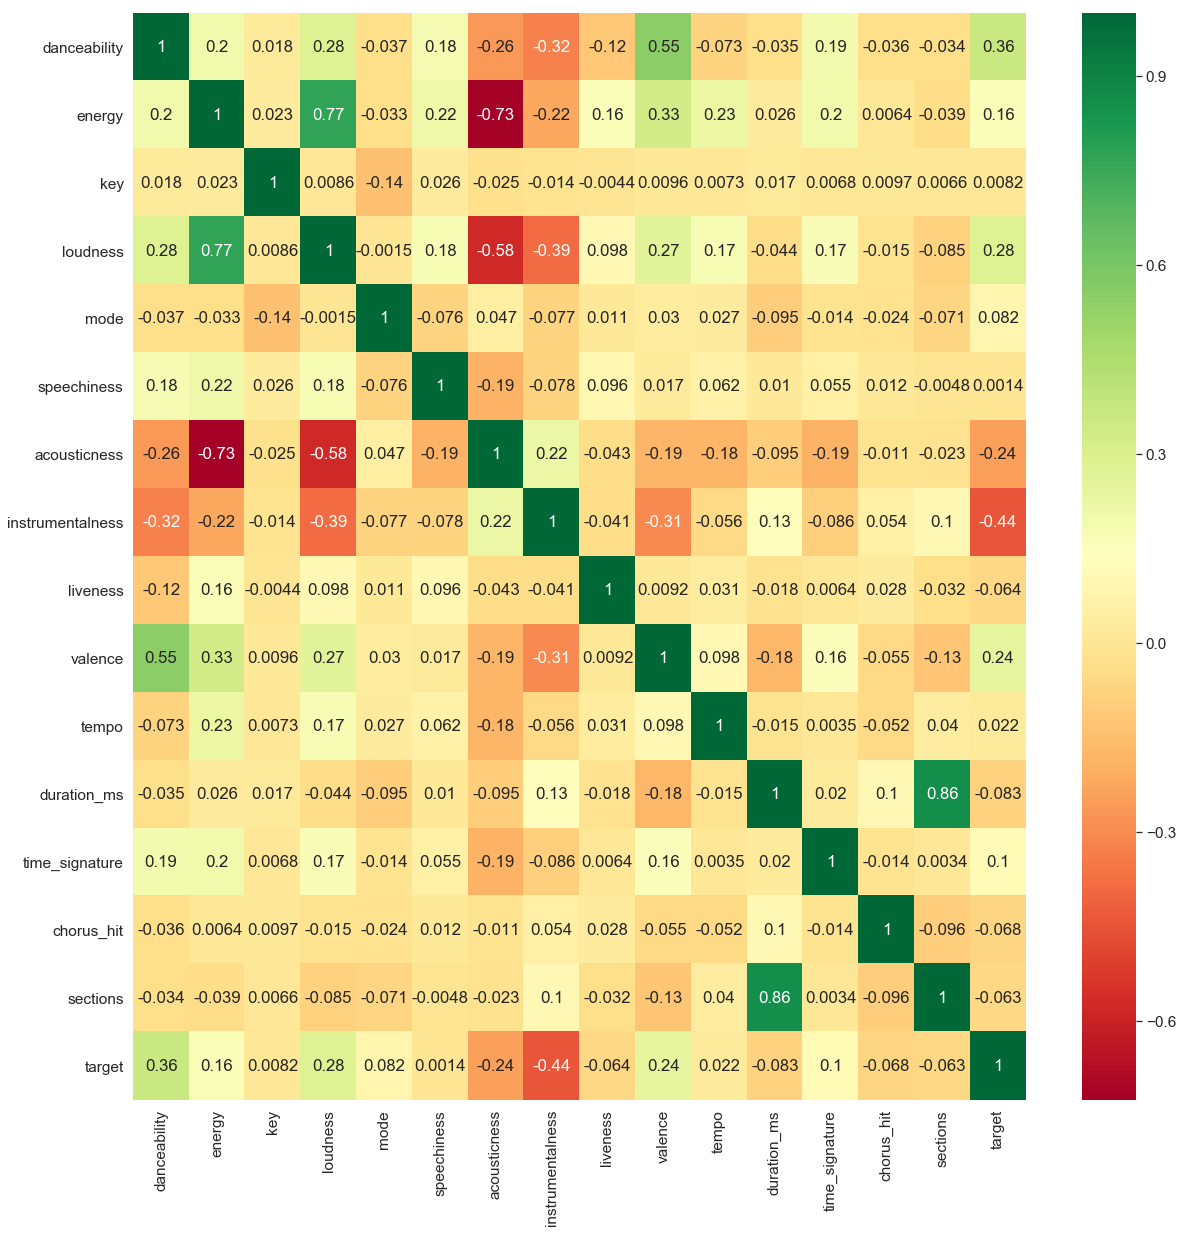

In [14]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.set(font_scale=1.4)
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,linewidths=0,cmap="RdYlGn")

In [18]:
df_1=df
y=df_1['target']
x=df_1.iloc[:,[3,4,5,7,8,10,11,12,13,14,15,16]]
x.head()

,danceability,energy,key,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit
0,0.741,0.626,1,0,0.0886,0.000000,0.0828,0.706,108.029,188493,4,41.18681
1,0.550,0.415,9,0,0.0520,0.000000,0.1080,0.274,172.065,205463,4,44.89147
2,0.482,0.873,0,1,0.0853,0.000000,0.4090,0.737,165.084,214320,4,32.17301
3,0.438,0.919,0,0,0.0495,0.000000,0.1580,0.195,151.026,225813,4,34.01444
4,0.742,0.853,9,1,0.0393,0.000005,0.3320,0.950,107.030,208280,4,43.42073


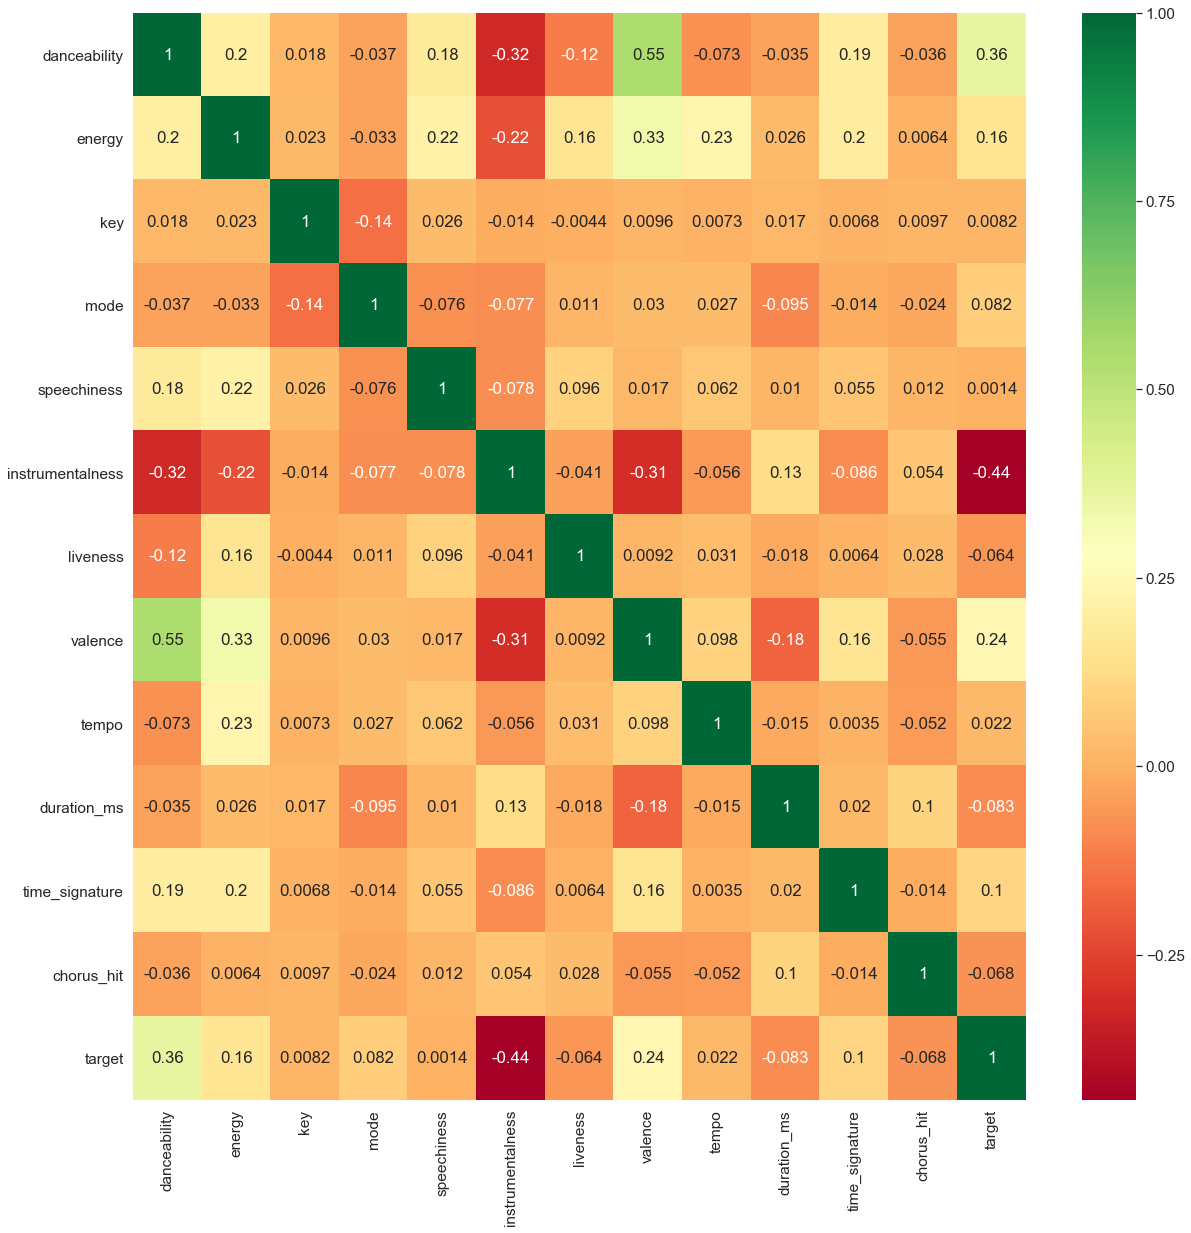

In [19]:
norm = MinMaxScaler().fit(x)
x_norm = norm.transform(x)
x=pd.DataFrame(data=x_norm,columns=x.columns)
data=pd.concat([x,y],axis=1)
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.set(font_scale=1.4)
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,linewidths=0,cmap="RdYlGn")
